In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = 50
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

import statsmodels
import statsmodels.api as sm

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# import the XGBoost function for classification
from xgboost import XGBClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
data=pd.read_csv('Transformed.csv')
data.head()

,Unnamed: 0,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,Age,ChildrenInHH_Yes,HandsetRefurbished_Yes,HandsetWebCapable_Yes,TruckOwner_Yes,RVOwner_Yes,Homeownership_Unknown,BuysViaMailOrder_Yes,RespondsToMailOffers_Yes,OptOutMailings_Yes,NonUSTravel_Yes,OwnsComputer_Yes,HasCreditCard_Yes,NewCellphoneUser_Yes,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_Yes,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,New_maritalstatus_Yes,CreditRating,Churn
0,0,-1.160580,-0.783685,-1.276518,-0.444774,-0.754292,-0.256130,-0.558645,-0.461939,-0.947937,-0.514034,-0.859058,-0.681673,-0.490104,-0.117996,-1.205704,-0.876154,-0.378157,-0.675917,-0.392055,-0.464100,2.108370,0.265315,-0.818300,0.130266,0.343160,-0.073884,0.070426,-0.883867,-0.572264,-0.102378,-0.553165,1.315425,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,3,1
1,1,-1.488361,-1.558803,-1.581047,-0.721787,-0.754292,-0.256130,0.029331,0.030061,-1.052171,-0.684813,-1.060799,-0.681673,-0.490104,-1.166591,-1.205704,-0.876154,-1.283919,-1.214554,-0.392055,-0.610991,2.016572,-0.687563,-0.818300,0.130266,-0.998903,2.404823,-0.787982,-0.883867,-0.572264,0.220233,-0.553165,-0.148322,1,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,2,1
2,2,-0.602404,-1.567202,-0.406192,-0.721787,-0.754292,-0.256130,0.037109,0.030061,-1.133754,-0.684813,-1.224658,-0.681673,-0.490104,-1.160676,-1.185222,-0.876154,-1.361552,-1.144059,-0.392055,-0.610991,2.078213,-0.687563,-0.818300,-0.963680,-0.998903,2.811137,-0.787982,-0.883867,-0.572264,0.562858,-0.553165,-1.650029,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,2,0
3,3,0.406812,0.840653,0.957636,0.123980,-0.754292,-0.256130,0.662769,0.231433,0.956226,0.207226,0.627948,0.249774,0.227656,0.357155,1.244885,0.636395,1.328215,0.858817,-0.392055,0.351607,2.047619,0.265315,0.508156,1.024514,0.832384,0.286876,-0.787982,-0.883867,-0.572264,0.562858,-0.553165,-1.214162,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0
4,4,-1.481005,-1.600985,-1.581047,-0.721787,-0.754292,-0.256130,0.044890,0.025025,-1.133754,-0.684813,-1.224658,-0.681673,-0.490104,-1.166591,-1.205704,-0.876154,-1.389289,-1.241170,-0.392055,-0.610991,1.853948,0.265315,0.508156,0.700396,0.680032,1.306178,-0.787982,-0.883867,-0.572264,1.682612,0.061017,0.547631,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3,1


In [3]:
x=data.drop(columns=['Unnamed: 0','Churn'])

target=data['Churn']


In [4]:
### Removing non significant variables according to the stastical test.

insig=['RoamingCalls','PercChangeRevenues','CallForwardingCalls','TruckOwner_Yes','RVOwner_Yes','OptOutMailings_Yes',
      'NonUSTravel_Yes','OwnsComputer_Yes','HasCreditCard_Yes','NewCellphoneUser_Yes','OwnsMotorcycle_Yes','Occupation_Crafts',
       'Occupation_Homemaker', 'Occupation_Other', 'Occupation_Professional','Occupation_Retired', 'Occupation_Self', 
       'Occupation_Student','New_maritalstatus_Yes']

x_cols=set(x.columns)
insig=set(insig)
x_final=x_cols.symmetric_difference(insig)
x=x[list(x_final)]
x.head()

x.shape

(50679, 40)

In [5]:
xtrain,xtest,ytrain,ytest=train_test_split(x,target,test_size=0.3,random_state=0)

## K-Nearest Neighbors(KNN)

In [9]:
# instantiate the 'KNeighborsClassifier'
# n_neighnors: number of neighbors to consider
# default metric is minkowski, and with p=2 it is equivalent to the euclidean metric
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(xtrain, ytrain)

In [10]:
train_predict=knn_model.predict(xtrain)

In [13]:
print(classification_report(ytrain,train_predict))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88     25403
           1       0.75      0.52      0.61     10072

    accuracy                           0.81     35475
   macro avg       0.79      0.72      0.75     35475
weighted avg       0.81      0.81      0.80     35475



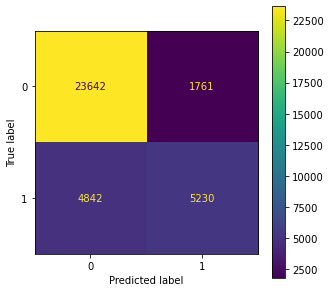

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.rcParams['figure.figsize']=[5,5]
ConfusionMatrixDisplay.from_predictions(ytrain,train_predict)

#### test performance

In [15]:
test_predict=knn_model.predict(xtest)

In [16]:
print(classification_report(ytest,test_predict))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77     10773
           1       0.35      0.22      0.27      4431

    accuracy                           0.65     15204
   macro avg       0.53      0.53      0.52     15204
weighted avg       0.61      0.65      0.63     15204



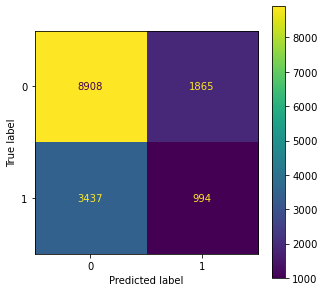

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.rcParams['figure.figsize']=[5,5]
ConfusionMatrixDisplay.from_predictions(ytest,test_predict)

## 3.1 Optimal Value of K (using GridSearchCV)

In [18]:
import time

In [20]:
%%time
# create a dictionary with hyperparameters and its values
# n_neighnors: number of neighbors to consider
# usually, we consider the odd value of 'n_neighnors' to avoid the equal number of nearest points with more than one class
# pass the different distance metrics to the parameter, 'metric'
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
knn_classification = KNeighborsClassifier()


knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid.fit(xtrain, ytrain)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 23} 

CPU times: total: 59min 21s
Wall time: 1h 8min 9s


In [21]:
knn_class = KNeighborsClassifier(n_neighbors = 23,metric= 'manhattan')
knn_model_1 = knn_class.fit(xtrain, ytrain)

In [22]:
train_predict=knn_model_1.predict(xtrain)

In [23]:
test_predict=knn_model_1.predict(xtest)

In [24]:
# train report

In [25]:
print(classification_report(ytrain,train_predict))

              precision    recall  f1-score   support

           0       0.73      0.98      0.84     25403
           1       0.65      0.08      0.14     10072

    accuracy                           0.73     35475
   macro avg       0.69      0.53      0.49     35475
weighted avg       0.71      0.73      0.64     35475



In [26]:
# test report

In [27]:
print(classification_report(ytest,test_predict))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82     10773
           1       0.45      0.05      0.10      4431

    accuracy                           0.71     15204
   macro avg       0.58      0.51      0.46     15204
weighted avg       0.64      0.71      0.61     15204



In [31]:
print(roc_auc_score(ytest,test_predict))

0.5137087936622318


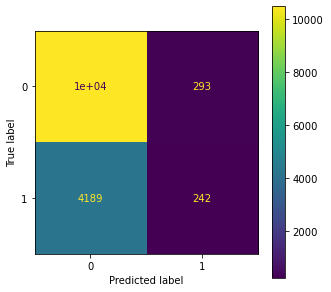

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.rcParams['figure.figsize']=[5,5]
ConfusionMatrixDisplay.from_predictions(ytest,test_predict)

### Inference:-
* the accuracy is 71%.
* recall score for 1 is 0.05.
* auc score is 0.513.

# 4. Naive Bayes Algorithm

It uses a `Bayes' Theorem` with the assumption of independence of predictor variables. The sklearn library provides different naive bayes classifiers, as `GaussianNB`, `MultinomialNB` and so on.

In [33]:
# instantiate the 'GaussianNB'
gnb = GaussianNB()

# fit the model using fit() on train data
gnb_model = gnb.fit(xtrain, ytrain)

In [34]:
train_predict=gnb_model.predict(xtrain) 

In [36]:
test_predict=gnb_model.predict(xtest)

In [ ]:
#train report

In [35]:
print(classification_report(ytrain,train_predict))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80     25403
           1       0.39      0.19      0.26     10072

    accuracy                           0.68     35475
   macro avg       0.56      0.54      0.53     35475
weighted avg       0.64      0.68      0.65     35475



In [ ]:
#test report

In [37]:
print(classification_report(ytest,test_predict))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80     10773
           1       0.41      0.21      0.28      4431

    accuracy                           0.68     15204
   macro avg       0.57      0.54      0.54     15204
weighted avg       0.64      0.68      0.65     15204



In [38]:
print(roc_auc_score(ytest,test_predict))

0.5429938722530391


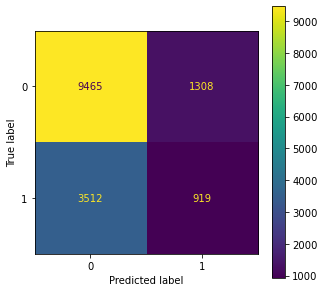

In [39]:
plt.rcParams['figure.figsize']=[5,5]
ConfusionMatrixDisplay.from_predictions(ytest,test_predict)

### Inference:-
* The accuracy is 68%.
* The recall score for 1 is 0.21.

### Conclusion:-
* Gaussian Naive Bayes gave good Auc score and recall score for churners.